In [1]:
# install dependencies
!pip install -U torch torchvision cython Pillow==6.2.2
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.1)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.4.2)
Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.14)
     |████████████████████████████████| 2.1MB 5.0MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-tkshkj2x
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-tkshkj2x
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275252 sha256=d9d1d256a3bb34b5f236b09d3d020d803616fb0b4092e7c4f9306f2520a26296
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhpy_t29/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.0
    Uninstalling pycocotools-2.0.0:
      Successfully uninstalled pycocotools-2.0.0
gcc (Ubuntu 7.4.0-1ubuntu1~18.04.1) 7.4.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2180 (delta 0), reused 2 (delta 0), pack-reused 2171
Receiving objects: 100% (2180/2180), 1.81 MiB | 26.55 MiB/s, done.
Resolving deltas: 100% (1412/1412), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 61kB 5.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.dev200107-cp36-none-any.whl size=30304 sha256=9b31b3844dd4a92c3650fb7f0c797991c78d50141ca35a030d32aa000404927c
  Stored in directory: /root/.cache/pip/wheels/f9/d7/18/835aedb5b044e37c0c87cafeba9a51239b46e0e7e8dc02b0e1
Successfully built fvcore
ERROR: fvcore 0.1.dev200107 has requirement pyyaml>=5.1, but you'll have pyyaml 3.13 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Running setup.py develop for detectron2


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

--2020-01-07 10:54:02--  https://www.athensguide.com/shopping/ermou-street.jpg
Resolving www.athensguide.com (www.athensguide.com)... 158.106.190.55
Connecting to www.athensguide.com (www.athensguide.com)|158.106.190.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94750 (93K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  92.53K  --.-KB/s    in 0.1s    

2020-01-07 10:54:03 (727 KB/s) - ‘input.jpg’ saved [94750/94750]



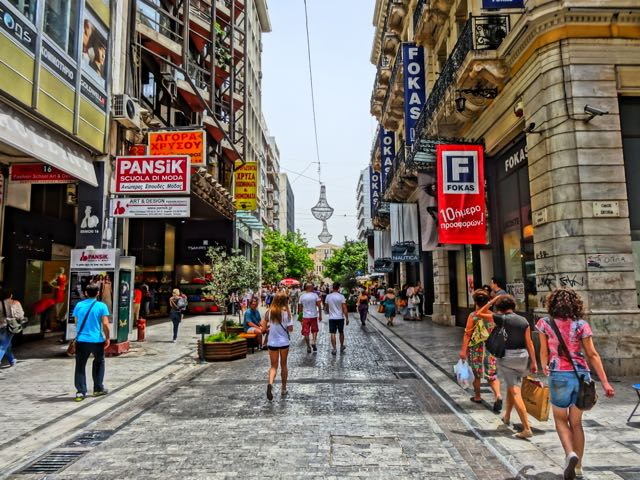

In [6]:
!wget https://www.athensguide.com/shopping/ermou-street.jpg -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [7]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the detectron2:// shorthand
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

WARNING [01/07 10:54:08 d2.config.compat]: Config '/content/detectron2_repo/detectron2/model_zoo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [8]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[5.3616e+02, 2.8771e+02, 6.1547e+02, 4.7592e+02],
        [7.0557e+01, 2.8126e+02, 1.1253e+02, 3.9937e+02],
        [4.8492e+02, 2.9130e+02, 5.3965e+02, 4.4009e+02],
        [4.5919e+02, 2.8733e+02, 5.0218e+02, 4.1298e+02],
        [2.6126e+02, 2.9606e+02, 2.9418e+02, 4.0318e+02],
        [3.2413e+02, 2.8209e+02, 3.4966e+02, 3.5741e+02],
        [1.6786e+02, 2.8709e+02, 1.8785e+02, 3.4085e+02],
        [2.9692e+02, 2.7994e+02, 3.2160e+02, 3.5548e+02],
        [3.5612e+02, 2.8704e+02, 3.6996e+02, 3.2803e+02],
        [2.4298e+02, 2.9924e+02, 2.6507e+02, 3.5140e+02],
        [3.8034e+02, 2.8958e+02, 3.9666e+02, 3.2617e+02],
        [5.8751e-01, 2.8811e+02, 2.6468e+01, 3.7061e+02],
        [5.4628e+02, 3.1690e+02, 5.9638e+02, 4.0481e+02],
        [6.9171e+01, 2.9890e+02, 9.6975e+01, 3.5641e+02],
        [2.7997e+02, 2.7791e+02, 3.0006e+02, 2.8534e+02],
        [1.9791e+02, 3.3051e+02, 2.4906e+02, 3.6159e+02],
        [4.5345e+02, 3.5859e+02, 4.7333e+02, 3.8663e+02],
        

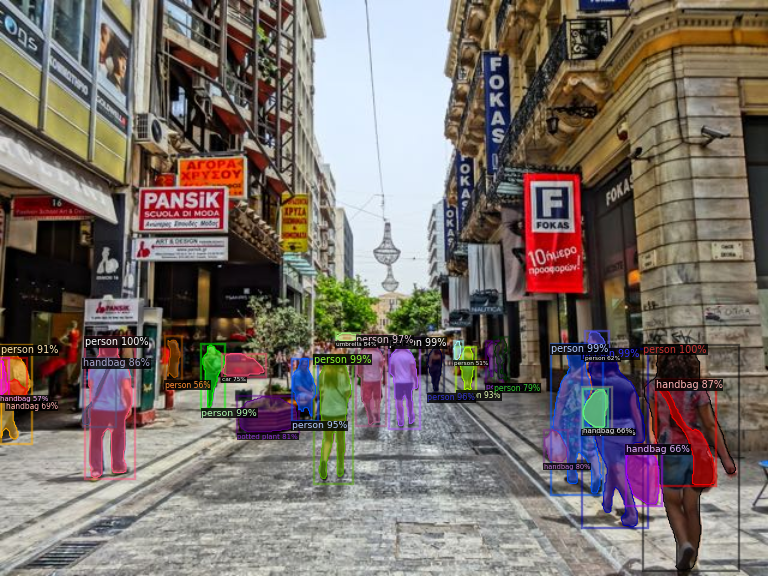

In [9]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])